## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

* Молодец, что не забыла про заголовок и описание задачи проекта. Но так же не мало важно добавлять описание данных, с которыми предстоить работать и небольшой план выполнения проекта.
    
    
* Вижу, что нумерация ячеек кода начинается не с 1. Перед отправкой проекта лучше перезапускать ноутбук, чтобы проверить, что все ячейки кода выполняются корректно (пункт `Kernel > Restart & Run All` на панели инструментов).

</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
#from pymystem3 import Mystem
#from nltk.stem.snowball import SnowballStemmer 
import pymorphy2
import seaborn as sns
import matplotlib.pyplot as plt



* https://python-school.ru/nlp-text-preprocessing/
* https://pymorphy2.readthedocs.io/en/latest/

In [2]:
df = pd.read_csv('..\datasets\loaner_reliability_data.csv')
display(df.head(10))
df.info()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод

В таблице собрана статистика о платежеспособности клиентов банка. При выводе первых 10 строчек таблицы,в глаза бросается неоднородность данных. Например, отрицательный стаж работы, в столбце education обнаружено написание типов образования заглавными и строчными буквами и т.д. Далее была выведена сводная информация о таблице, в ходе которой обнаружилось, что в данных присутствуют пропуски значений.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо.

</div>

### Шаг 2. Предобработка данных

### Обработка пропусков

In [3]:
df.isnull().sum() #количество пропусков в таблице по столбцам

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [4]:
df['income_type'].unique() #список названий income_type(тип занятости)

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [5]:
print(len(df[df['days_employed'] < 0])) #количество отрицательных значений в столбце стаж работы

15906


Количество отрицательных значений в столбце "стаж работы" очень большое, удалить эти строчки мы не сможем чтобы избавиться от артефактов. Поэтому лучше использовать в данном случае приведение к абсолютным значениям, исходя из предположения, что знак "-" подгружен какой-то системой автоматически и ошибочно.

In [6]:
df['days_employed'] = abs(df['days_employed']) #приведение столбца days_employed к неотрицательным значениям

In [7]:
#Замена пустых значений в столбцах total_income и days_employed на медиану ежемесячного дохода и трудового стажа
df['total_income'] = df['total_income'].fillna(df.groupby(['education_id', 'income_type'])['total_income'].transform('median'))
df['days_employed'] = df['days_employed'].fillna(df.groupby(['education_id', 'income_type'])['days_employed'].transform('median'))
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично, с обработкой пропусков согласна.

</div>

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

* Но еще есть важный момент, помимо отрицательных значений стажа там еще аномально большие значения, поэтому советую обработку пропусков делать после исправления ошибок в данных.
    
* Также лучше сначала вывести и оценить сгруппированную таблицу, чтобы понять, что пропуски будут заполнены корректными значениями.

</div>

Поскольку одной из приоритетных задач этого проекта является выявление зависимости возврата кредита в срок и наличием детей, возникла необходимость оценить объем каждой группы в зависимости от количества детей. В ходе проверки обнаружилась, что в данных присутствуют артефакты - 20 и -1 ребенок, что вызывает сомнения в корректности представленных данных. Т.к. процент артефактов в процентном соотношении от всего датафрейма составляет менее 1%, можно смело удалить данные строки.

In [8]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [9]:
df = df[~df['children'].isin([-1, 20])] #Удаление строк с некорректными значениями
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int64  
 1   days_employed     21402 non-null  float64
 2   dob_years         21402 non-null  int64  
 3   education         21402 non-null  object 
 4   education_id      21402 non-null  int64  
 5   family_status     21402 non-null  object 
 6   family_status_id  21402 non-null  int64  
 7   gender            21402 non-null  object 
 8   income_type       21402 non-null  object 
 9   debt              21402 non-null  int64  
 10  total_income      21402 non-null  float64
 11  purpose           21402 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Согласна, что эти значения ошибочные, но можно попробовать их исправить, например `-1` заменить на 1, а `20` на 2. Также не забывай, что когда ты удаляешь эти аномалии, ты исключаешь и другие столбцы, которые могут пригодиться в анализе данных.

</div>

### Вывод

Пропущенные значения обнаружены в следующих столбцах: days_employed(общий трудовой стаж в днях) и total_income(ежемесячный доход), причем количество пропущенных значений одинаково и в том, и в другом случае, что может говорить о зависимости этих переменных. С одной стороны, можно предположить, что люди не имеющие стажа, не имеют доход. С другой стороны, если смотреть данные из столбца income_type(тип занятости), можно увидеть, что человек работает на какой-то должности. Соответственно, необходимо заполнить пропуски в таблице медианой по доходу и по трудовому стажу. Из-за неравномерного дохода по всей выборке и большого количества отрицательных значений в столбце трудового стажа было принято решение использовать медиану для различных групп из столбца income_type (тип занятости) - медиана трудового стажа и ежемесячного дохода по группам income type даст более объективный результат, чем среднее арифметическое. Предположим, что отрицательные аномалии в данных стажа были вызваны ошибочным вводом, поэтому они приведены к абсолютным значениям,а уже потом подсчитана медиана.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Здорово, что ты стараешься выдвигать предположительные причины возникновения пропусков.

</div>

### Замена типа данных

In [10]:
#Просмотр общей информации о таблице, сколько памяти используется при обработке
df.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int64  
 1   days_employed     21402 non-null  float64
 2   dob_years         21402 non-null  int64  
 3   education         21402 non-null  object 
 4   education_id      21402 non-null  int64  
 5   family_status     21402 non-null  object 
 6   family_status_id  21402 non-null  int64  
 7   gender            21402 non-null  object 
 8   income_type       21402 non-null  object 
 9   debt              21402 non-null  int64  
 10  total_income      21402 non-null  float64
 11  purpose           21402 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 11.8 MB


In [11]:
#Создание категориального листа для перевода столбцов из типа данных object в тип данных category для оптимизации работы кода
cat_list = ['education', 'family_status', 'gender', 'income_type']

In [12]:
df['days_employed']= df['days_employed'].astype('int') #Замена вещественного типа данных на целочисленный
df[cat_list] = df[cat_list].astype('category') #Перевод столбцов из типа данных object в  тип category
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21402 non-null  int64   
 1   days_employed     21402 non-null  int32   
 2   dob_years         21402 non-null  int64   
 3   education         21402 non-null  category
 4   education_id      21402 non-null  int64   
 5   family_status     21402 non-null  category
 6   family_status_id  21402 non-null  int64   
 7   gender            21402 non-null  category
 8   income_type       21402 non-null  category
 9   debt              21402 non-null  int64   
 10  total_income      21402 non-null  float64 
 11  purpose           21402 non-null  object  
dtypes: category(4), float64(1), int32(1), int64(5), object(1)
memory usage: 1.5+ MB


### Вывод

После просмотра общей информации о таблице и параметра "memory_usage", который составлял в первоначальном варианте с типами данных object 11.8 MB была проведена оптимизация кода и типы данных в столбцах ['education', 'family_status', 'gender', 'income_type'] были переведены в тип category. Вследствие этого memory usage теперь составляет 1.6+ MB. 
Также столбец days_employed (общий трудовой стаж в днях) был переведен в целочисленный тип методом astype(), так как дни измеряются в целых числах. 

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо.

</div>

### Обработка дубликатов

In [13]:
df['education'] = df['education'].str.lower()
print('Количество дубликатов:', df.duplicated().sum())
old_length = len(df)
df.drop_duplicates(inplace=True)
new_length = len(df)
print('Процентное изменение: {:.2%}'.format((old_length - new_length)/old_length))
print('Новый размер датафрейма:', new_length)

Количество дубликатов: 71
Процентное изменение: 0.33%
Новый размер датафрейма: 21331


### Вывод

В ходе проверки датафрейма на наличие дубликатов методом duplicated() в сочетании с методом sum() было обнаружено, что количество дубликатов - 71. После удаления процентное изменение составило 0.33%, что не сильно повлияет на дальнейшее исследование. Возможная причина появления дублирующих строчек - выгрузка таблиц из разных баз данных, где содержится информация об одних и тех же людях.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично, всё верно.

</div>

### Лемматизация

In [14]:
# %%time
# from pymystem3 import Mystem
# m = Mystem()
# text = "Красивая мама красиво мыла раму"
# for i in range(10):
#     lemmas = m.lemmatize(text)

In [15]:
# %%time
# stemmer = SnowballStemmer("russian") 
# text = "Красивая мама красиво мыла раму"

# for i in range(10):
#     lemmas = stemmer.stem(text)

In [16]:
# %%time
# ''.join(m.lemmatize('приобретение автомобиля'))

In [17]:
# purpose = 'приобретение автомобиля'
# morph.parse(purpose)[0].normal_form

In [18]:
morph = pymorphy2.MorphAnalyzer()
# Функция, которая позволяет лемматизировать данные и выделить ключевые слова для приведения столбца purpose 
#(цель получения кредита) к единому виду
def purpose_words(purpose):
    purpose_words = ''.join(morph.parse(purpose)[0].normal_form)
    return purpose_words

In [19]:
%%time
df['purpose_words'] = df['purpose'].apply(purpose_words)
display(df['purpose_words'].unique())

array(['покупка жильё', 'приобретение автомобиль',
       'дополнительное образование', 'сыграть свадьба',
       'операции с жилие', 'образование', 'на проведение свадьба',
       'покупка жилья для семья', 'покупка недвижимость',
       'покупка коммерческой недвижимость', 'покупка жилой недвижимость',
       'строительство собственной недвижимость', 'недвижимость',
       'строительство недвижимость', 'на покупку подержанного автомобиль',
       'на покупку своего автомобиль',
       'операции с коммерческой недвижимость',
       'строительство жилой недвижимость', 'жильё',
       'операции со своей недвижимость', 'автомобиль',
       'заняться образование', 'сделка с подержанным автомобиль',
       'получение образование', 'свадьба',
       'получение дополнительного образование', 'покупка своего жильё',
       'операции с недвижимость', 'получение высшего образование',
       'свой автомобиль', 'сделка с автомобиль', 'профильное образование',
       'высшее образование', 'покупка 

Wall time: 4.75 s


### Вывод

Была проведена лемматизация для выделения лемм в значениях столбца с целями получения кредита и методом join изменили списки, которые бы образовались в ходе лемматизации, на строчные значения. Затем, используя функцию unique(), выделили уникальные слова для визуального анализа и дальнейшего преобразования столбца цели кредита к единому виду.

### Категоризация данных

In [20]:
#Создание функции, которая приводит цели кредита к единому виду
def purpose_category(purpose):
    if 'жилье' in morph.parse(purpose)[0].normal_form or 'недвижимость' in morph.parse(purpose)[0].normal_form:
        return 'недвижимость'
    if 'свадьба' in morph.parse(purpose)[0].normal_form:
        return 'свадьба'
    if 'автомобиль' in morph.parse(purpose)[0].normal_form:
        return 'автомобиль'
    return 'образование'
df['purpose_category'] = df['purpose_words'].apply(purpose_category)


In [21]:
display(df['purpose_category'].value_counts()) #Количество значений каждой категории

образование     8425
недвижимость    6314
автомобиль      4279
свадьба         2313
Name: purpose_category, dtype: int64

Заемщики отдают предпочтение получению кредита на покупку недвижимости.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Молодец, ты отлично справилась с выделением целей кредита.

</div>

In [22]:
#Распределение среднего возраста заемщиков в зависимости от цели кредита
category_age = df[['dob_years', 'purpose_category']] 
category_age.groupby('purpose_category').median()

,dob_years
purpose_category,
автомобиль,43
недвижимость,43
образование,42
свадьба,42


In [23]:
display(df['dob_years'].describe())

count    21331.000000
mean        43.277952
std         12.575300
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Изначально было предположение, что в зависимости от возраста заемщиков меняются их предпочтения, и средний возраст заемщиков варьируется в зависимости от цели кредита. Но это предположение не подтвердилось, поэтому смотрим дальше :)

In [24]:
#Расчет минимального и максимального ежемесячного дохода для формирования категоризации по доходу
print('Минимальное значение ежемесячного дохода:', df['total_income'].min())
print('Максимальное значение ежемесячного дохода:', df['total_income'].max())

Минимальное значение ежемесячного дохода: 20667.26379327158
Максимальное значение ежемесячного дохода: 2265604.028722744


In [25]:
#Функция для группировки заемщиков по уровню дохода
category_income_dict = {30000:"низкий достаток", 
                        70000:"средний достаток", 
                        150000:"высокий достаток", 
                        250000:"очень высокий достаток"}
def income_groups(income):
    if income <= 30000:
        return category_income_dict.get(30000)
    if 30000< income <= 70000:
        return category_income_dict.get(70000)
    if 70000 < income <= 150000:
        return category_income_dict.get(150000)
    return category_income_dict.get(250000)
    
df['income_groups'] = df['total_income'].apply(income_groups)
category_income = df[['total_income', 'income_groups']]
display(category_income)
#Функция работает корректно

,total_income,income_groups
0,253875.639453,очень высокий достаток
1,112080.014102,высокий достаток
2,145885.952297,высокий достаток
3,267628.550329,очень высокий достаток
4,158616.077870,очень высокий достаток
...,...,...
21520,224791.862382,очень высокий достаток
21521,155999.806512,очень высокий достаток
21522,89672.561153,высокий достаток
21523,244093.050500,очень высокий достаток


<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Здорово, что ты применила собственную функцию для категоризации данных.

</div>

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Для категоризации дохода могу предложить использовать метод `describe()`, он укажет на границы квартилей, что поможет разделить данные на равные части. А равные части удобнее сравнивать между собой.

</div>

In [26]:
#Создание сводной таблицы, которая отражает количество людей в группе по уровню ежемесячного дохода, вовремя вернувших задолженность по кредиту
df['debt1'] = df['debt']
df_pivot = df.pivot_table(index=['income_groups'], columns='debt', values='debt1', aggfunc='count')
df_pivot['ratio'] = df_pivot[1]/(df_pivot[0] + df_pivot[1])
display(df_pivot)


debt,0,1,ratio
income_groups,,,
высокий достаток,9037,864,0.087264
низкий достаток,20,2,0.090909
очень высокий достаток,9199,767,0.076962
средний достаток,1343,99,0.068655


### Вывод

После лемматизации столбца purpose (цель кредита) и выделения лемм была написана функция, которая приводит категории цели кредита к единому виду. Оказалось, что люди отдают предпочтение покупке недвижимости. Далее была выдвинута гипотеза, что в зависимости от возраста, у людей меняются предпочтения, но гипотеза отверглась после выведения медианы возраста по каждой группе в зависимости от цели кредита. Был рассчитан минимальный и максимальный уровень ежемесячного дохода для равномерного разбиения на группы в зависимости от дохода. Далее была создана функция, которая ранжирует людей в зависимости от их дохода с помощью так называемого "словаря".
Затем была создана сводная таблица, которая отражает количество людей в группе по уровню ежемесячного дохода, вовремя вернувших задолженность по кредиту и людей, которые просрочили платеж. Наибольшая доля людей,просрочивщих платеж, принадлежит группе с низким достатком - почти 9% должников (от общего числа заемщиков в этой группе). Напротив, наиболее ответственными заемщиками оказались люди со средним достатком.


<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Вот здесь как раз важный момент, группа с низким доходом очень маленькая по объему, т.е. данных недостаточно, чтобы достоверно оценить полученный процент. Поэтому по такой грппе лучше сказать, что данных мало для оценки. Поэтому выше я и посоветовала разделить на равные по количеству группы, чтобы можно было удобнее сравнивать проценты.

</div>

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

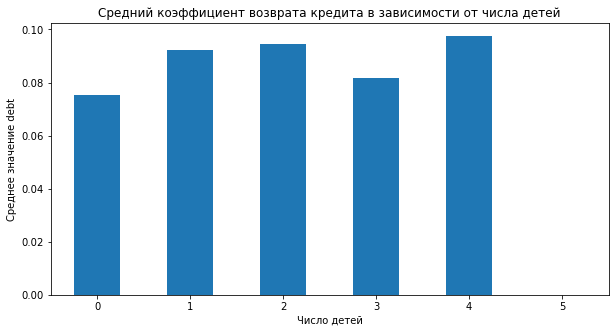

In [27]:
#График, который показывает коэффициент возврата кредита в зависимости от количества детей
df.groupby('children')['debt'].mean().plot(kind='bar', figsize=(10, 5), rot=0)
plt.title('Средний коэффициент возврата кредита в зависимости от числа детей')
plt.xlabel('Число детей')
plt.ylabel('Среднее значение debt')
plt.show()

In [28]:
df_pivot_children =df.pivot_table(index=['children'], columns='debt', values = 'debt1', aggfunc='count')
df_pivot_children['ratio'] = df_pivot_children[0]/(df_pivot_children[0] + df_pivot_children[1])
display(df_pivot_children)

debt,0,1,ratio
children,,,
0,13028.0,1063.0,0.924562
1,4364.0,444.0,0.907654
2,1858.0,194.0,0.905458
3,303.0,27.0,0.918182
4,37.0,4.0,0.902439
5,9.0,NaN,NaN


### Вывод

Исходя из результата исследования заметна тенденция, что люди, не имеющие детей, чаще возвращают кредит в срок. Они же являются наиболее крупной группой заемщиков. Также, исходя из полученной сводной таблицы оказалось, что люди с 5 детьми никогда не имели задолженности по кредиту.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо. Но насчет групп от 3х детей и более стоит быть аккуратнее, здесь данных тоже мало. Группа с 5ю детьми просто не набрала достаточно данных, чтобы получить достоверный процент, и сказать, что они сильно хорошие мы тоже не можем. Чтобы эти малые выборки учесть, можно сделать две категории: с детьми и без, тогда две выборки будут достаточны для достоверной оценки.

</div>

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Чтобы не делать дополнительных расчетов столбца доли должников, могу дать подсказку как быстро сформировать сводную таблицу. Параметр `columns` нужно опустить, параметру `values` задать столбец `debt`, а параметру `aggfunc` передать список функций `['count','sum','mean']`. И получится три столбца: общее количество заемщиков, количество должников и доля должников.

</div>



- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [29]:
df_pivot_family_status =df.pivot_table(index=['family_status'], columns='debt', values = 'debt1', aggfunc='count')
df_pivot_family_status['ratio'] = df_pivot_family_status[1]/(df_pivot_family_status[0] + df_pivot_family_status[1])
display(df_pivot_family_status)

debt,0,1,ratio
family_status,,,
Не женат / не замужем,2523,273,0.097639
в разводе,1105,84,0.070648
вдовец / вдова,888,63,0.066246
гражданский брак,3749,385,0.093130
женат / замужем,11334,927,0.075606


### Вывод

После проведения исследования обнаружилось,что люди с семейным положением "не женат/не замужем" и "гражданский брак" чаще других имеют задолженности по возврату кредита.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично, всё верно.

</div>


- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [30]:
df_pivot = df.pivot_table(index=['income_groups'], columns='debt', values='debt1', aggfunc='count')
df_pivot['ratio'] = df_pivot[1]/(df_pivot[0] + df_pivot[1])
display(df_pivot)


debt,0,1,ratio
income_groups,,,
высокий достаток,9037,864,0.087264
низкий достаток,20,2,0.090909
очень высокий достаток,9199,767,0.076962
средний достаток,1343,99,0.068655


### Вывод

Наибольшая доля людей,просрочивщих платеж, принадлежит группе с низким достатком - почти 9% должников (от общего числа заемщиков в этой группе). Напротив, наиболее ответственными заемщиками оказались люди со средним достатком.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо. Но здесь я уже выше оставила пояснения, что с группа с низким достатоком возможно не так плоха, просто данных о ней мало.

</div>


- Как разные цели кредита влияют на его возврат в срок?

In [31]:
df_pivot_purpose_category = df.pivot_table(index = ['purpose_category'], columns = 'debt', values='debt1', aggfunc='count')
df_pivot_purpose_category['ratio'] = df_pivot_purpose_category[0]/(df_pivot_purpose_category[1]+df_pivot_purpose_category[0])
display(df_pivot_purpose_category)

debt,0,1,ratio
purpose_category,,,
автомобиль,3879,400,0.906520
недвижимость,5842,472,0.925245
образование,7748,677,0.919644
свадьба,2130,183,0.920882


### Вывод

Исходя из полученной  таблицы, чаще всего люди возвращают в срок кредиты, связанные с недвижимостью и свадьбой. В первом случае это можно связать с тем, что к покупке недвижимости люди относятся более ответственно и обдуманно, чем к остальным видам кредитов. И к тому же, неуплата долга по ипотеке, например, грозит лишением недвижимости, а значит и дома, что побуждает людей вовремя выплачивать кредит. 
Во втором случае это может быть связано с тем, что свадьба - это краткосрочное вложение для события одного дня, поэтому люди стремятся выплатить этот вид кредита как можно скорее, чтобы над ними не висел этот долг, так как событие уже прошло.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично. Молодец, что стараешься пояснить полученные результаты.

</div>


### Шаг 4. Общий вывод

Перед исследованием производилась подготовка данных к анализу: выявлялись аномалии в данных, производилась чистка данных от артефактов и дубликатов, осуществлялась замена вещественного типа данных на целочисленный и производилась оптимизация кода. Проводилась лемматизация и категоризация данных. 
Основной целью проекта было выявление влияния  семейного положения и количества детей клиента на факт погашения кредита в срок. В ходе исследования выяснилось, что заемщики, не имеющие детей, чаще возвращают кредит в срок.С другой стороны, люди с семейным положением "не женат/не замужем" и "гражданский брак" чаще других имеют задолженность по возврату кредита. Наиболее ответственными заемщиками оказались люди со средним достатком, и чаще всего люди возвращают в срок кредиты, связанные с недвижимостью и свадьбой.


<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Хорошо. Но я бы посоветовала полученные выводы дополнить процентами, чтобы пояснить, что значит `чаще возвращают кредит в срок` или `чаще имеют задолженность`. Так результаты анализа будут более понятны.

</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Спасибо за твой интересный проект! Я его приняла с первой попытки, что редкость:) Потому что критичных комментариев нет, ты молодец!
    
Здорово, что ты применила группировку для обработки пропусков. Только как я выше отметила, старайся перед обработкой пропусков исправить ошибки в данных.
    
Ты отлично справилась с категоризацией данных, и верно выделила с помощью лемм цели кредитов. Здорово, что в работе ты используешь собственные функции, молодец.
    
Для тебя не составило проблем формирование сводных таблиц, я лишь оставила комментарий, как это можно сделать быстрее.
    
У тебя получились хорошие выводы, только старайся их дополнять цифрами, чтобы более понятно пояснять слова - больше, лучше, меньше, чаще и т.д.
    
Поздравляю тебя еще раз с успешным завершением проекта и желаю удачи в прохождении курса:)

</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.